# Twitter Data Acquisition and analysis

### import packages

In [112]:
# !pip install --user package_name

import tweepy
import csv
import pandas as pd
import string
import folium
from nltk.corpus import stopwords

import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import re
from collections import Counter
from string import punctuation

from wordcloud import WordCloud 

from textblob import TextBlob

### Setup tweep api

In [8]:
####input your credentials here
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

### Data acquisition

In [ ]:
#####modi
query = 'modi'
# Open/Create a file to append data
csvFile = open(query+'_data.csv', 'w', encoding='utf-8')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet_info in tweepy.Cursor(api.search, q=query, count=1000, tweet_mode='extended', lang="en", since="2019-01-01").items():
    if tweet_info.place is not None:
        try:
            if hasattr(tweet_info, 'retweeted_status'):
                try:
                    tweet_text = tweet_info.retweeted_status.extended_tweet.full_text
                except:
                    tweet_text = tweet_info.retweeted_status.full_text
            else:
                try:
                    tweet_text = tweet_info.extended_tweet.full_text
                except AttributeError:
                    tweet_text = tweet_info.full_text
            
                print (tweet_info.created_at, tweet_info.user.screen_name, tweet_text, tweet_info.favorite_count, 
                       tweet_info.retweet_count, tweet_info.place.bounding_box.coordinates,tweet_info.place.full_name,
                       tweet_info.place.country)
                
                csvWriter.writerow([tweet_info.created_at, 
                                    tweet_info.user.screen_name, 
                                    tweet_text, 
                                    tweet_info.favorite_count,
                                    tweet_info.retweet_count,
                                    tweet_info.place.bounding_box.coordinates,
                                    tweet_info.place.full_name,
                                    tweet_info.place.country])
            
        except Exception:
            pass

2019-03-26 14:25:56 Rabindr88990589 @ZeeNews @arunjaitley @sudhirchaudhary Sir ,why u think so ?Modi PM will  will get around  400seats Opp parties pro pak, pro terrorist,  pro antinationals  pro casteism ,pro corruption,   support will be main cause of Modi grand victory Besides  his Honesty Nationalism  patriotism development too 0 0 [[[84.686271, 25.2014], [85.117254, 25.2014], [85.117254, 25.731555], [84.686271, 25.731555]]] Danapur, India India
2019-03-26 14:24:41 KarachiPulse021 #Modi denies #MahathirMohamad ‘right’ to fly over #India https://t.co/r9MamEeO6b 0 0 [[[66.95121, 24.802239], [67.133179, 24.802239], [67.133179, 25.007912], [66.95121, 25.007912]]] Karachi, Pakistan Pakistan
2019-03-26 14:23:51 jfIr7uMa4oDxOYQ D R CHLIA AJD  of hisar court 
Is #blackspotonjudiciary 
Bjp ruled Harayana Government 
CM Manohar lal Khattar Mis using their political Powers.
We want to change present judiciary system.
We are against this kind of injustice.
Narendar Modi Is Indirectly Responsib

2019-03-26 13:57:24 Rabindr88990589 Nation should know, politics is the best business/lndustry in India, a begger would be Arabpati in few years, U see around ,u will find in all state , Barring Exception , Modi,  PM honesty unquestionable  Trust him n support in2019 election 0 0 [[[84.686271, 25.2014], [85.117254, 25.2014], [85.117254, 25.731555], [84.686271, 25.731555]]] Danapur, India India
2019-03-26 13:56:38 kuttan337 @smitaprakash @maryashakil Marya Shakil is a Congress paid Journalists, we had been hearing &amp; watching her reporting &amp; as anchor in debates in the studio , she inherently expresses &amp; her body language shows that she is a biased anti Modi / BJP/ RSS person. 0 0 [[[76.446888, 10.681582], [76.856449, 10.681582], [76.856449, 10.929981], [76.446888, 10.929981]]] Pallakad, India India
2019-03-26 13:56:12 sardesairajdeep 8 pm: on the Countdown : my newsmakers include the producer of the Narendra Modi film; and 2 new faces of 2019 from left and right , Kanhaiya K

2019-03-26 13:23:19 AvijitSinha5 @kirti_sd @watdehel @b_k70 @Ash_LoneHunter @ganesan312 @aayeff1 @RanjitOne @sunilddesai @twilightfairy @SatanicJumlas @Puneetvizh @DickDarryl @sagar_bh26 @SRasikDoshi @Vidyut @TachilR @IchbinUjjaini @GovindanMadhu @NSOOD6 @starrymm07 @terence_fdes @priyapyadav18 @rkgarg9 @sanjayuvacha @SocioPoliticalW @XyzTweeter @FltLtSwarna @joerave @SunilKandalkar4 @Tikam @shaqueelsinai @epawitter1 @Scimitar_SS @Tamil1947 @krishpachegonkr @ChokidarCh0rHai @rsvas2 @kukk44 @Saqibmugloo @tarun_k_trivedi @scrapravi @instigate_in @Nikhil_P_B @navasmytheen @PreetiSMenon @Tapan_999 @advocate_co @BJP4India It is the policy of RSS. It never recognised MM Joshi, who is a PhD in neuclear physics &amp; was disciple of MN saha, as a leader. When ABV was PM &amp; LKA was party boss, they selected Modi &amp; Govindacharya to replace ABV &amp; LKA.
Govindacharya has gone to oblivion. Don't know why. 1 0 [[[88.094457, 22.269493], [88.610027, 22.269493], [88.610027, 22.955918], [88.09

2019-03-26 12:57:49 mukeshmarda @MudaliyarIndian @s_mandrawadkar @latha_venkatesh @RaghuramRajan What was the NPA figure in march 2014 how did it ballon yo more than 9 lac crore in 5 yrs? Let me know how performing assets become non performing assets in last 5 yrs &amp; lastly who gave the stupid idea of demonotisation to mr modi. 0 0 [[[76.657719, 10.80795], [77.100465, 10.80795], [77.100465, 11.237298], [76.657719, 11.237298]]] Coimbatore, India India
2019-03-26 12:57:43 dhruval_dave https://t.co/sJILWQ7PPS

India's Rahul Gandhi takes on the Modi juggernaut

#ModiHaiToMumkinHai #ModiBest #RahulLovesTerrorists #RahulForBehtarBharat #BJP #India #ElectionsWithNDTV #Election2019 https://t.co/hvmIgVHBT4 0 0 [[[70.694641, 22.04699], [71.097384, 22.04699], [71.097384, 22.477865], [70.694641, 22.477865]]] Rajkot, India India
2019-03-26 12:52:40 laadravee Here's How Ajay Devgn, Kriti Sanon, Rajkummar Rao, Madhavan Replied To PM Narendra Modi’s ‘Vote Kar’ Election 2019 Campaign
https://t.co/aS

2019-03-26 12:24:17 Awadhes95017541 @CS102623 @CNBCTV18Live @RBI @latha_venkatesh He's the blue-eyed boy of the presstitute media, more so of cnnc bcoz he talks a lot of nonsense , esp against Modi govt. Quite likely angling for congress tickt in future 0 0 [[[77.373474, 12.919037], [77.739371, 12.919037], [77.739371, 13.231381], [77.373474, 13.231381]]] Bengaluru, India India


Rate limit reached. Sleeping for: 519


2019-03-26 12:22:40 seshanm @IndiaToday @sardesairajdeep @rajeevdubey He has no better clue to push growth and still needs to think about it after the years spent in RBI.

Observe his priorities a) Infrastructure b) Cleaning up the Banks are exactly the things Modi has done &amp; is doing. (A) 1 0 [[[72.80161, 19.16162], [73.03441, 19.16162], [73.03441, 19.593413], [72.80161, 19.593413]]] Thane, India India
2019-03-26 12:18:44 RafiAhm89808445 @manakgupta They must thank Modi for that. Even they appear secular in comparison with Modi. 0 0 [[[77.3305776, 12.731936], [77.7863188, 12.731936], [77.7863188, 13.1142933], [77.3305776, 13.1142933]]] Bengaluru South, India India
2019-03-26 12:18:09 icedtea28 @DattatriBhatt @adamya_chetana Sir you are harming modi more with these tweets. 0 0 [[[77.3305776, 12.731936], [77.7863188, 12.731936], [77.7863188, 13.1142933], [77.3305776, 13.1142933]]] Bengaluru South, India India
2019-03-26 12:17:17 rajennair Shame that ppl are promoting Hindi in a Sout

2019-03-26 11:47:11 Prasant76395578 D Modi  Govt  has  done  a alround  development  of d country  in their  last  five  years  of  ruling.  The development  include,  defence and defence equipments,  foreign affairs/policy, Swatch  Abhiyan,  Ujwala,  Ayushman,  GST,   OROP,  Railways,  Roads  andv bridges  etc . 0 0 [[[85.624118, 20.064307], [86.082706, 20.064307], [86.082706, 20.43391], [85.624118, 20.43391]]] Bhubaneshwar, India India
2019-03-26 11:46:14 shasi64 I invite you to join my #Modi11 &amp; support PM @NarendraModi in coming General Elections. Visit https://t.co/OvLPjSxVg3 to join &amp; help shape #NewIndia. 1 se banenge 11, Layenge Modi Dobara! via @JoinModi11 #Modi11 #NewIndia via @JoinModi11 1 0 [[[74.260409, 15.692325], [74.701333, 15.692325], [74.701333, 16.073652], [74.260409, 16.073652]]] Belgaum, India India
2019-03-26 11:45:46 Entice_Through @SwamiGeetika BJP 2014 #ManifestoCheck: From better public transport and housing to 100 smart cities, the BJP made many promi

2019-03-26 11:14:29 ParveenKader @GovindS31886819 @rssurjewala @RahulGandhi Stupid video ! No wonder there are so many PIL against the release of the movie made on the life of Modi before elections ! 0 0 [[[72.74484, 18.845343], [73.003648, 18.845343], [73.003648, 19.502937], [72.74484, 19.502937]]] Mumbai, India India
2019-03-26 11:14:19 saurabhtewari76 Watching Modi - Journey Of A Common Man - Exclusive - Official Trailer - An Eros Now Original Series https://t.co/mTbkArDO97 Congratulations @ashish30sharma 5 3 [[[72.74484, 18.845343], [73.003648, 18.845343], [73.003648, 19.502937], [72.74484, 19.502937]]] Mumbai, India India
2019-03-26 11:10:55 shasi64 This is  Modi fied @BJP4India @BJP4Karnataka we are for New India   Not for IndirA Team Thukde GANGs @INCIndia @INCKarnataka  @narendramodi ji Again PM https://t.co/TPMAsE3oSH 1 0 [[[74.260409, 15.692325], [74.701333, 15.692325], [74.701333, 16.073652], [74.260409, 16.073652]]] Belgaum, India India
2019-03-26 11:10:51 Viv2511 Economist

2019-03-26 10:46:20 dirklewis @t_d_h_nair Can this loud mouth talk about what Modi has achieved and not what the Congress has not. I have never seen in my entire life a situation where people are trying to be judged on the performance of others, when they have had the opportunity to prove themselves. @Tejasvi_Surya 4 1 [[[77.373474, 12.919037], [77.739371, 12.919037], [77.739371, 13.231381], [77.373474, 13.231381]]] Bengaluru, India India
2019-03-26 10:45:40 mehta_rathanm @GauthamMachaiah He got Ticket just bcz his speech in which he said,if you are patriots you should vote modi else you are anti national.modi sycophancy is enough to get tickets. 0 0 [[[77.373474, 12.919037], [77.739371, 12.919037], [77.739371, 13.231381], [77.373474, 13.231381]]] Bengaluru, India India
2019-03-26 10:45:10 Ranjan_Kamath @Tejasvi_Surya While you are at it, why don't you issue a diktat instructing the @narendramodi supporting saffron diaspora to renounce their US, UK passports and return to be "with Modi

2019-03-26 10:27:54 Rayateshwar @Republic_Bharat

Won't spare those who sponsor terrorism: PM Modi
https://t.co/RRfolEbLc6 via NaMo App https://t.co/NKEO2XhV4C 0 0 [[[75.690789, 22.525584], [76.245579, 22.525584], [76.245579, 22.817381], [75.690789, 22.817381]]] Indore, India India
2019-03-26 10:27:30 Rayateshwar @Republic_Bharat

PM lays foundation stone of Integrated Command and Control Centres in Sikkim, Arunachal Pradesh and Tripura
https://t.co/Ri8CQ4Nh1q via NaMo App https://t.co/KJogTSlC2R 0 1 [[[75.690789, 22.525584], [76.245579, 22.525584], [76.245579, 22.817381], [75.690789, 22.817381]]] Indore, India India
2019-03-26 10:26:20 Rkmalhotra12 My 4 year old child was abused,shouted at and called KUTTA by a fellow child. ShallI I go to Twitter and blame RSS and Modi for this? https://t.co/ULPqYazvxo 0 0 [[[76.84252, 28.397657], [77.347652, 28.397657], [77.347652, 28.879322], [76.84252, 28.879322]]] New Delhi, India India
2019-03-26 10:26:05 MatungaMami @girishalva A bigger star pl

Rate limit reached. Sleeping for: 680


2019-03-26 09:46:41 WondrousMan2 @BabithaBabu6 @rach_scorpio @_DiISe_ Even Modi and amit shah were given clean chit.. 0 0 [[[76.707671, 28.199529], [77.241711, 28.199529], [77.241711, 28.537521], [76.707671, 28.537521]]] Gurgaon, India India
2019-03-26 09:43:21 javedphoolwala SAD SMRITI IRANI ADDRESS OUR PRIME MINISTER SHRI NARENDRA MODI BY JUST CALLING HIM NARENDRA MODI IN HER RALLY IN BADROHI WHY  SO? 0 0 [[[72.74484, 18.845343], [73.003648, 18.845343], [73.003648, 19.502937], [72.74484, 19.502937]]] Mumbai, India India
2019-03-26 09:41:18 ProfRajalakshmi Modi ji hambling himself. Everyone  becoming ...too many so called  Chowkidhars  making fun of it. https://t.co/aGCclGLbAt 0 0 [[[80.1851996, 13.0417174], [80.2712123, 13.0417174], [80.2712123, 13.091511], [80.1851996, 13.091511]]] Egmore Nungambakkam, India India
2019-03-26 09:41:14 Devasigamani5 The chowkidar turned CHOR MODI can never come back. https://t.co/GdsgpEEm7b 0 0 [[[72.74484, 18.845343], [73.003648, 18.845343], [73.0036

2019-03-26 09:21:33 bakshihs @Ra_THORe @RahulGandhi @BJP4India @BJP4Rajasthan @INCIndia Modi is not country. 0 0 [[[74.712042, 30.067047], [75.223126, 30.067047], [75.223126, 30.414127], [74.712042, 30.414127]]] Bathinda, India India
2019-03-26 09:20:47 RoshanSdrprop Former CM, J&amp;K @OmarAbdullah &amp; his sister Sara Pilot, w/o Sachin Pilot, Dy CM of Raj inaugurated NIRAV MODI Store on 22nd March 2014.
@RahulGandhi - Ask them how much money they got for this?
And  btw, Mr. Rahul Gandhi,
You answer who gave money to Nirav for opening this store? https://t.co/gNiBH9xZpV 2 4 [[[76.707671, 28.199529], [77.241711, 28.199529], [77.241711, 28.537521], [76.707671, 28.537521]]] Gurgaon, India India
2019-03-26 09:20:15 MandeepBajwa @virsanghvi @bainjal Joshi as BJP president made Modi general secretary and brought him to national prominence. 7 1 [[[76.7038129, 30.665455], [76.8492359, 30.665455], [76.8492359, 30.795316], [76.7038129, 30.795316]]] Chandigarh, India India
2019-03-26 09:18:32 m

2019-03-26 08:47:03 ssr99 @SalmanSoz Your biggest challenge till the elections are over is not from Modi &amp; team but from your own team .. there are enough and more motormouths in your party and if they can hold their horses for some time then that'll be a commendable achievement ! What do you feel, can they ? 0 0 [[[78.3897718, 17.3013989], [78.5404168, 17.3013989], [78.5404168, 17.4759], [78.3897718, 17.4759]]] Hyderabad, India India
2019-03-26 08:46:22 Prakash14981847 @aravindAppan100 @Gurupra63877313 @priyagn @shahid_siddiqui What r u trying to teach me?  Can do without ur advise. I am not a congi but vote will be against Modi the fascist. The social fabric of this country has been thrown out of the window. Transformation is probably for the worst,  ground realities  . 1 0 [[[72.74484, 18.845343], [73.003648, 18.845343], [73.003648, 19.502937], [72.74484, 19.502937]]] Mumbai, India India
2019-03-26 08:44:21 ShardaAshima Who is @Tejasvi_Surya to say those against modi are against

2019-03-26 08:21:05 AmitG20162 @rssurjewala Now, you Congressi approving that economy is in good shape under Mr Modi due to which 3.5 lakh crore can be spent, as well as how much commission has been calculated by Congressi corrupt party please let us know as plan is to loot India not to help poors. 1 0 [[[58.2624738, 23.4527047], [58.6658653, 23.4527047], [58.6658653, 23.6456132], [58.2624738, 23.6456132]]] Muscat, Oman Oman
2019-03-26 08:20:49 Deepankar456 PMO Narendra Modi: Private School Fees Hike - Sign the Petition! https://t.co/PIcA8y9aNH via @ChangeOrg_India 0 0 [[[77.20469, 28.620877], [77.641989, 28.620877], [77.641989, 28.926259], [77.20469, 28.926259]]] Ghaziabad, India India
2019-03-26 08:20:36 ravicmathur @TOIIndiaNews Such is fear of Modi 0 0 [[[77.20469, 28.620877], [77.641989, 28.620877], [77.641989, 28.926259], [77.20469, 28.926259]]] Ghaziabad, India India
2019-03-26 08:20:21 rajennair Bjp is main election plank is Modi is India, if you are not with Modi, you are anti

2019-03-26 08:01:46 Freak1411 https://t.co/oHHHjB8oeo

When I say, @nitin_gadkari has been the most performing minister of this government perhaps with the other titan being @SushmaSwaraj despite the @PMOIndia meddling in her ministry, my reasons are based on what I see on ground. 0 0 [[[79.138936, 28.210856], [79.608334, 28.210856], [79.608334, 28.601237], [79.138936, 28.601237]]] Bareilly, India India
2019-03-26 08:00:21 rajennair If you are with Modi you are with India and if you are not with Modi you are anti India’ says blind Modi bhakt @Tejasvi_Surya, he has called Indians as anti India, their only fault they do not toe Modi line, there is threat in his appeal n insulted an average Indians https://t.co/3QEfqog8hj 0 0 [[[72.74484, 18.845343], [73.003648, 18.845343], [73.003648, 19.502937], [72.74484, 19.502937]]] Mumbai, India India
2019-03-26 07:56:41 011524e7729d4eb @OnmanoramaLive True he is a Dravidian Brahmin &amp; can't get membership in Aryasamaj.He is neither  chowkidhar n

Rate limit reached. Sleeping for: 504


2019-03-26 07:33:19 rajbalodi ‘You Are, By Far, The Best Prime Minister For India Today’: Kabir Bedi Wishes Narendra Modi Is Elected As PM Again As Actor Replies To His ‘Vote Kar’ Campaign
https://t.co/pblVaAGXVQ

via NaMo App https://t.co/002hPUa6Gg 0 0 [[[72.74484, 18.845343], [73.003648, 18.845343], [73.003648, 19.502937], [72.74484, 19.502937]]] Mumbai, India India
2019-03-26 07:31:14 iamNBeniwal Anna Hazare wants to know your location 
#BJP #AAP #Elections #Modi #Kejriwal https://t.co/kaXsv6JNsU 1 0 [[[72.6100969, 25.8528564], [73.4524747, 25.8528564], [73.4524747, 26.4943697], [72.6100969, 26.4943697]]] Jodhpur, India India
2019-03-26 07:30:57 dineshbaranwa13 Pm modi is the best pm in india 0 0 [[[80.658613, 26.642291], [81.110202, 26.642291], [81.110202, 27.008048], [80.658613, 27.008048]]] Lucknow, India India
2019-03-26 07:28:48 shariqmashhadi For ruling regime and Opposition, healthcare doesn’t seem to be an issue | The Indian Express https://t.co/XfCaGHE6Ji via @IndianExpres

2019-03-26 07:13:13 gourab_odisha Why foreign media is anti Modi #Modi https://t.co/iMWDsUk211 0 0 [[[77.3305776, 12.731936], [77.7863188, 12.731936], [77.7863188, 13.1142933], [77.3305776, 13.1142933]]] Bengaluru South, India India
2019-03-26 07:11:02 Desi_Musings Most days: Modi is a bad Prime Minister. His actions are intolerable. Blah blah blah. 
Today: Ashwin is a bad Captain. That's unacceptable from a captain of a team. Blah blah blah.
Why do we whine so much? Why can't we just talk about dogs &amp; cats &amp; babies &amp; animal babies? 1 0 [[[-122.035311, 37.193164], [-121.71215, 37.193164], [-121.71215, 37.469154], [-122.035311, 37.469154]]] San Jose, CA United States
2019-03-26 07:10:27 bulusu_ @mjakbar .@RahulGandhi's camouflaged final assault on poverty is indeed a dubious 'bicholi punaravaas yojana' for dalals of the dynasty, rendered hors de combat by the Congress nemesis Narendra Modi. 0 0 [[[78.3897718, 17.3013989], [78.5404168, 17.3013989], [78.5404168, 17.4759], [78.

2019-03-26 06:51:57 afbutt @danavdehan @IndianTalmudist @Chandan14743814 @nidi_nj @chaudhry_nabeel @SushmaSwaraj @fawadchaudhry @IndiainPakistan I'm not sure if it's photoshopped by Modi is friends with Saudi king while in India he pretends to dislike Islam and Pakistan https://t.co/UEhvMz8vTb 0 0 [[[150.520928608, -34.1183470085], [151.343020992, -34.1183470085], [151.343020992, -33.578140996], [150.520928608, -33.578140996]]] Sydney, New South Wales Australia
2019-03-26 06:50:39 ps_lubana @yadavakhilesh Well said jee. May we voters be wise and push out BJP led by mean fellow Modi 0 0 [[[80.658613, 26.642291], [81.110202, 26.642291], [81.110202, 27.008048], [80.658613, 27.008048]]] Lucknow, India India
2019-03-26 06:47:52 AlokRai2001 Enrollment is on:
'Art of Lying'
By
"Sri Sri Sri Modi Bhayankar"
of 'Entire Political Science' fame
#LokSabhaElections2019 #RahulForBehtarBharat #ChowkidarChorHai #India #IndiaFirst #BJP @BJP4India @BJP4Karnataka 1 0 [[[77.373474, 12.919037], [77.739371, 

2019-03-26 06:21:30 Dhichkyaaon @srini091 Totally agree. He made a few good points but shouldn't say things like anti India if you're not with modi. 0 0 [[[77.373474, 12.919037], [77.739371, 12.919037], [77.739371, 13.231381], [77.373474, 13.231381]]] Bengaluru, India India
2019-03-26 06:21:27 Rabindr88990589 India blundered not to declarled  Hindu nation  in1947The result before us a  Muslim NC leader JK declares to say pak jindabad 100times Even he brands n dares to sayPM modi Terrorist All Indians shd vote only To Modi n BJP No other parties 0 0 [[[84.686271, 25.2014], [85.117254, 25.2014], [85.117254, 25.731555], [84.686271, 25.731555]]] Danapur, India India
2019-03-26 06:20:40 DarrshanVK_BJP @purviraju1 @Tej_AnanthKumar @BSYBJP @blsanthosh Plz vote for modi
https://t.co/HosEFXaGZm 0 0 [[[75.3338772, 16.4097132], [76.0254737, 16.4097132], [76.0254737, 17.0895541], [75.3338772, 17.0895541]]] Bijapur, India India
2019-03-26 06:20:29 Kamalcmehta Shri Narendra Modi is already giving  w

2019-03-26 06:00:41 Rayateshwar @Republic_Bharat

From Neglected States to the Gateway to South Asia – 5 Years of Modi in North East
https://t.co/ywfim072C9 via NaMo App https://t.co/FfuJSSFrVx 0 0 [[[75.690789, 22.525584], [76.245579, 22.525584], [76.245579, 22.817381], [75.690789, 22.817381]]] Indore, India India
2019-03-26 05:59:58 Praveen_Adabala @srivatsayb @RahulGandhi U all ......,modi ji delivered what he said ,
U all just firing in air .No target ,no destination,no aim.,no result 1 0 [[[84.432643, 22.009627], [85.12124, 22.009627], [85.12124, 22.482265], [84.432643, 22.482265]]] Raurkela-Panposh, India India
2019-03-26 05:59:18 aruaugust @shahid_siddiqui Dear Siddiqui, if you voted Modi in 2014 as you say, you did- you shdnt be disappointed with him at all. It’s “NATION FIRST”-that’s why we all voted him&amp; we are fine with what he has achieved. 0 0 [[[75.0139416, 15.1588276], [75.4587604, 15.1588276], [75.4587604, 15.5041816], [75.0139416, 15.5041816]]] Hubli, India India
2

Rate limit reached. Sleeping for: 680


2019-03-26 05:41:36 sandhyarachel @NADEEMGOUR_ @RahulGandhi @arjunmodhwadia @beindiya @VazeIndian @dralvirashah @buddha2019 @PallaviDeo5 @FarahKhanAli @shaktisinhgohil Can't imagine modi like this 0 0 [[[76.231237, 9.822153], [76.470673, 9.822153], [76.470673, 10.072395], [76.231237, 10.072395]]] Kanayannur, India India
2019-03-26 05:40:53 karthikr891 @publictvnews @nsitharaman @BJP4Karnataka @ShobhaBJP Chowkidar Modi it’s my new composition to Modi https://t.co/URd46giqvD 0 0 [[[76.4551434, 12.1175892], [76.8361765, 12.1175892], [76.8361765, 12.4512955], [76.4551434, 12.4512955]]] Mysore, India India
2019-03-26 05:39:31 RiazToori Modi denies Mahathir ‘right’ to fly over India  #ModiMindset https://t.co/9jYIMV75fB 0 0 [[[69.328873, 27.708226], [75.382124, 27.708226], [75.382124, 34.019989], [69.328873, 34.019989]]] Punjab, Pakistan Pakistan
2019-03-26 05:37:40 879c50f54a37411 If looters upa gave phonepe loans unasked now Modi made rules to recover the loans . dishonest MMS UPA RRR moro

2019-03-26 05:16:45 KanwalChadha @virsanghvi Your anger is justified. Two days back Rajasthan Guv Kalyan Singh literally campaigned for Modi and BJP party. Being on constitutional post he said Modi should again become PM and BJP party should win elections.
 Is that justified? 1 0 [[[76.7038129, 30.665455], [76.8492359, 30.665455], [76.8492359, 30.795316], [76.7038129, 30.795316]]] Chandigarh, India India
2019-03-26 05:14:48 SKaushal97 Get Ready 😎
It’s time for Narendra Modi
#NaMoAgain
Thanks @namomerchandise https://t.co/sjGBU5UMCZ 17 1 [[[77.882808, 30.227984], [78.134712, 30.227984], [78.134712, 30.413361], [77.882808, 30.413361]]] Dehradun, India India
2019-03-26 05:14:39 aniruddhanandi Great... you solved the puzzle... why BJP lost in 2004... people didn't like Advani ji to be PM... are you trying to do the same here?... but rest assure... Modi ji shall rule for next 10 years at least... Try it in 2029 election.. https://t.co/ymtQH3PX3s 0 0 [[[58.2624738, 23.4527047], [58.6658653, 

2019-03-26 04:49:22 PranabK62448396 But why pinches you. But when someone one say modi chor hai doesn't. Shocking! https://t.co/fntHFP4DB1 0 0 [[[88.094457, 22.269493], [88.610027, 22.269493], [88.610027, 22.955918], [88.094457, 22.955918]]] Kolkata, India India
2019-03-26 04:49:00 awake1975 Modi’s Skill India Vs RaGa’s Kill India https://t.co/1eI4iXCy5A via @PGurus1, I am not upset with that! because Gandhis proved that long back. But I am shocked at media, N Ram @the_hindu , @sagarikaghose @waglenikhil @Ram_Guha n n...also determined to kill India. 0 0 [[[79.6505263, 5.9213829], [81.8787816, 5.9213829], [81.8787816, 9.8359375], [79.6505263, 9.8359375]]] Sri Lanka Sri Lanka
2019-03-26 04:48:46 cmankad @ShankerMurali @sardesairajdeep @narendramodi @TVMohandasPai Rajdeep won't utter a question against his masters!!! He has only one agenda.. Tarnish Modi and his work.. Even if something good happens for India.. He will find fault to dilute that happiness.. 0 0 [[[72.74484, 18.845343], [7

2019-03-26 04:28:38 mk2722372 @AamAadmiParty @preetiagr123 @ArvindKejriwal Without verifying his degrees? Modi again daring to fight election on same controversial degrees - hope election commissioner will verify the degree @CommissionIndia  @kanhaiyakumar @HardikPatel_ @KapilMishra_IND @KapilSibal 0 0 [[[77.332904, 13.892363], [78.051757, 13.892363], [78.051757, 14.361553], [77.332904, 14.361553]]] Puttaparthi, India India
2019-03-26 04:27:19 pandiansvce Groundbreaking announcement by @RahulGandhi

India's poorest 20% will recieve Rs. 72000 per year.
5 crore families or 25 crore people to benefit from this.

We are proud of this landmark decision.

Modi works for Ambani.
Congress works for India.
#ByeByeModi
#NoMoreModi https://t.co/Eq8EVDCsqR 0 0 [[[80.183081, 12.965942], [80.252142, 12.965942], [80.252142, 13.060495], [80.183081, 13.060495]]] Chennai, India India
2019-03-26 04:26:20 purohit_b @ranjan5ua @shahid_siddiqui There r 100 reason to supp @BJP4India but fake secularism nd an

2019-03-26 04:05:04 nitinsharma13 @Ra_THORe Mr Minister, RG has promised and yet to deliver..  So how he becomes a liar.... Go check with @narendramodi how many promises he made and how many he has honored... I am sure you will not be ashamed to call Modi a Liar... 2 1 [[[50.3251128, 25.5704959], [50.8226344, 25.5704959], [50.8226344, 26.3341076], [50.3251128, 26.3341076]]] Bahrain Bahrain
2019-03-26 04:03:37 Indiansproud @virsanghvi School teacher.. Army man and government employees have right to put there views... Why @derekobrienmp and you not ask question to @RahulGandhi that after several time oppose of RBI governer #raghuramrajan still loan given to the person like vijyemalya and nirav modi shameless 1 0 [[[88.014244, 22.396021], [88.421124, 22.396021], [88.421124, 23.02195], [88.014244, 23.02195]]] Haora, India India
2019-03-26 04:00:39 monika__shah The way Modi treats the respected names of his own party, the day he loses the mandate, his party men will stop respecting him and 

2019-03-26 03:30:25 DeepakV81743265 It's massage for pm Modi ...my village is so cute but here isn't nice road so I want to make it...plz 1 0 [[[84.165813, 25.763088], [84.180251, 25.763088], [84.180251, 25.772828], [84.165813, 25.772828]]] Amrit Pali Road Area, Ballia India
2019-03-26 03:29:46 princeawasthi_ Here's what wonder machine Chinook can do, four of which got inducted in IAF yesterday. A great gift to nation by the Modi govt!

#TuesdayThoughts
#TuesdayMotivation https://t.co/omxGFpX1ZV 1 1 [[[77.096236, 23.871941], [84.638873, 23.871941], [84.638873, 30.407576], [77.096236, 30.407576]]] Uttar Pradesh, India India
2019-03-26 03:27:36 contactrajeshp @wizajitmc @INCIndia Don't forget the defence allocation by Modi Govt. is less than 2% of GDP. 0 0 [[[76.231237, 9.822153], [76.470673, 9.822153], [76.470673, 10.072395], [76.231237, 10.072395]]] Kanayannur, India India
2019-03-26 03:23:25 Avisank @dhume Because we are confident that every Modi statement is measured and comes after 

Rate limit reached. Sleeping for: 709


### Data manipulation

In [107]:
col_names=['date','user','text','likes','retweets','bbox_cord','place_name','country']

df = pd.read_csv('modi_data.csv', names=col_names)

df.head()
#df.count()

,date,user,text,likes,retweets,bbox_cord,place_name,country
0,2019-03-26 14:25:56,Rabindr88990589,"@ZeeNews @arunjaitley @sudhirchaudhary Sir ,wh...",0,0,"[[[84.686271, 25.2014], [85.117254, 25.2014], ...","Danapur, India",India
1,2019-03-26 14:24:41,KarachiPulse021,#Modi denies #MahathirMohamad ‘right’ to fly o...,0,0,"[[[66.95121, 24.802239], [67.133179, 24.802239...","Karachi, Pakistan",Pakistan
2,2019-03-26 14:23:51,jfIr7uMa4oDxOYQ,D R CHLIA AJD of hisar court \r\nIs #blackspo...,2,2,"[[[74.030686, 21.073255], [82.809772, 21.07325...","Madhya Pradesh, India",India
3,2019-03-26 14:18:38,Pranay2270,"@CNBC_Awaaz @Alok_Awaaz Alok ji, \r\nModi is l...",0,0,"[[[75.4979969, 26.800561], [75.9970446, 26.800...","Jaipur, India",India
4,2019-03-26 14:17:08,Aabhas24,#mainbhichowkidaar Today I finished signing 20...,22,7,"[[[76.707671, 28.199529], [77.241711, 28.19952...","Gurgaon, India",India


In [114]:
# Sort dataframe by date column
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date',ascending=True)
df = df.reset_index().drop('index',axis=1)
df.head()

,date,user,text,likes,retweets,bbox_cord,place_name,country,clean_text,label
0,2019-03-26 03:40:37,dnyadav,@AdityaSVaidya @muglikar_ @narendramodi Modi g...,0,0,"[[[72.74484, 18.845343], [73.003648, 18.845343...","Mumbai, India",India,modi government fail,-1
1,2019-03-26 03:45:56,kalpna02891469,@ModiVolunteer @Tithi_Mishra @RahulGandhi @vin...,0,1,"[[[84.976939, 25.198297], [84.999359, 25.19829...","Jehanabad, India",India,let him wait till year,0
2,2019-03-26 03:49:43,ppriyadarshi111,Vote Kar: PM Narendra Modi appeals everyone du...,0,1,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,vote kar narendra modi appeals everyone during...,0
3,2019-03-26 03:49:53,ppriyadarshi111,#Modi4NewIndia\r\nThe foundation for a New Ind...,0,1,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,the foundation for new india 2022 has already ...,1
4,2019-03-26 03:50:29,ppriyadarshi111,#Modi4NewIndia\r\nNew India is where the poor ...,0,0,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,new india where the poor are taken out poverty...,1


In [115]:
df.shape

(548, 10)

### Data exploration

## Data Cleaning

In [116]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet
#

df['clean_text'] = df['text'].apply(processTweet)
df.head()

,date,user,text,likes,retweets,bbox_cord,place_name,country,clean_text,label
0,2019-03-26 03:40:37,dnyadav,@AdityaSVaidya @muglikar_ @narendramodi Modi g...,0,0,"[[[72.74484, 18.845343], [73.003648, 18.845343...","Mumbai, India",India,modi government fail,-1
1,2019-03-26 03:45:56,kalpna02891469,@ModiVolunteer @Tithi_Mishra @RahulGandhi @vin...,0,1,"[[[84.976939, 25.198297], [84.999359, 25.19829...","Jehanabad, India",India,let him wait till year,0
2,2019-03-26 03:49:43,ppriyadarshi111,Vote Kar: PM Narendra Modi appeals everyone du...,0,1,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,vote kar narendra modi appeals everyone during...,0
3,2019-03-26 03:49:53,ppriyadarshi111,#Modi4NewIndia\r\nThe foundation for a New Ind...,0,1,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,the foundation for new india 2022 has already ...,1
4,2019-03-26 03:50:29,ppriyadarshi111,#Modi4NewIndia\r\nNew India is where the poor ...,0,0,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,new india where the poor are taken out poverty...,1


In [103]:
# drop duplicates
df = df.drop_duplicates('clean_text')
df.shape

(512, 9)

## Data labelling

In [117]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

    
df['label'] = df['clean_text'].apply(analyze_sentiment)
df.head()

,date,user,text,likes,retweets,bbox_cord,place_name,country,clean_text,label
0,2019-03-26 03:40:37,dnyadav,@AdityaSVaidya @muglikar_ @narendramodi Modi g...,0,0,"[[[72.74484, 18.845343], [73.003648, 18.845343...","Mumbai, India",India,modi government fail,-1
1,2019-03-26 03:45:56,kalpna02891469,@ModiVolunteer @Tithi_Mishra @RahulGandhi @vin...,0,1,"[[[84.976939, 25.198297], [84.999359, 25.19829...","Jehanabad, India",India,let him wait till year,0
2,2019-03-26 03:49:43,ppriyadarshi111,Vote Kar: PM Narendra Modi appeals everyone du...,0,1,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,vote kar narendra modi appeals everyone during...,0
3,2019-03-26 03:49:53,ppriyadarshi111,#Modi4NewIndia\r\nThe foundation for a New Ind...,0,1,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,the foundation for new india 2022 has already ...,1
4,2019-03-26 03:50:29,ppriyadarshi111,#Modi4NewIndia\r\nNew India is where the poor ...,0,0,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,new india where the poor are taken out poverty...,1


## Tokenization and Stop words removal

In [118]:
# tokenize helper function
import string
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['narendra','modi','...','“','”','’','…','modi’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['clean_text'].apply(text_process) # tokenize style 1
df['no_modi'] = df['tokens'].apply(remove_words) #tokenize style 2
df = df.drop(['tokens'],axis=1)
df.head()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Searched in:
    - '/home/chaithanya/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/home/chaithanya/anaconda3/nltk_data'
    - '/home/chaithanya/anaconda3/share/nltk_data'
    - '/home/chaithanya/anaconda3/lib/nltk_data'
**********************************************************************


## Plot word frequency distribution

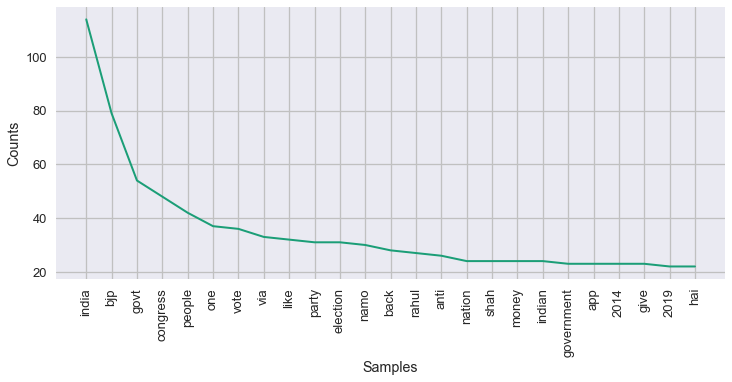

Text(0.5,0,'Word Rank')

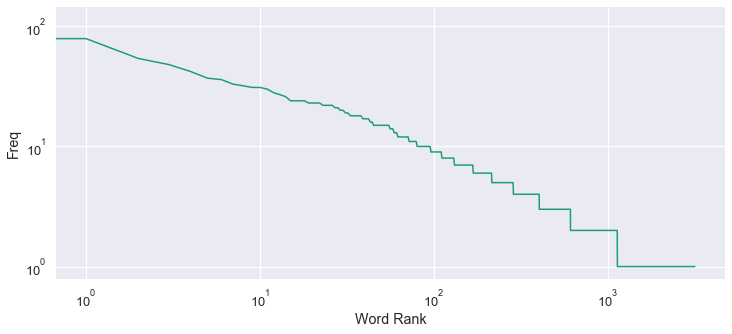

In [9]:
# plot word frequency distribution of first few words without narendra, modi
# no_modi
no_modi = []
for ls in df['no_modi']:
    words = [w for w in ls]
    for word in words:
        no_modi.append(word)
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(no_modi)
fd.plot(25,cumulative=False)

# log-log  of all words -- no_modi 
word_counts = sorted(Counter(no_modi).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Word Cloud

In [119]:
# split sentences to get individual words
all_words = []

for line in df['no_modi']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

KeyError: 'no_modi'

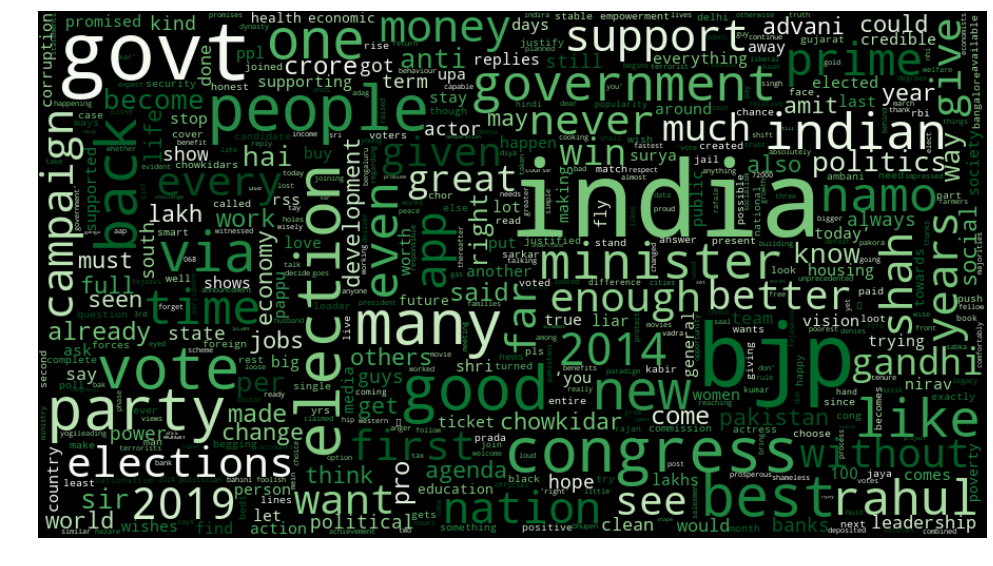

In [12]:
# split sentences to get individual words
all_pos_words = []
df_modi_pos = df[df.label==1]
for line in df_modi_pos['no_modi']: # try 'tokens'
    all_pos_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_pos_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Greens',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

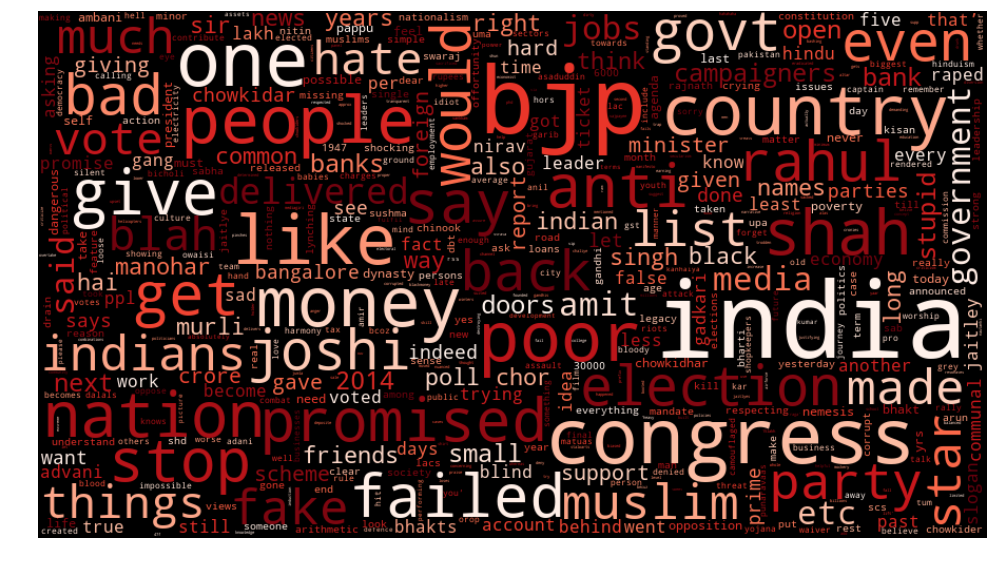

In [14]:
# split sentences to get individual words
all_neg_words = []
df_modi_neg = df[df.label==-1]
#df_modi_neg.head()
for line in df_modi_neg['no_modi']: # try 'tokens'
    all_neg_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_neg_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Reds',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Geographical mapping

In [4]:
# get central geo location from the bounding box for later mapping

# helper function to get mean of lats and longs
import numpy as np
import json
def geo_mean(x):
    y = json.loads(x)
    y = np.asarray(y)
    mean_geoloc = np.add(np.add((y[:][0][0]),(y[:][0][1]))/2,\
                         (np.add((y[:][0][2]),(y[:][0][3]))/2))/2    
    return np.around(mean_geoloc,decimals=6)

# append new column  and clean up df
df['geo_code'] = df['bbox_cord'].apply(geo_mean)
df = df.drop(['bbox_cord'],axis=1)
df.head()

NameError: name 'df' is not defined

In [120]:
df.to_pickle('df_modi.p') # save dframe to pickle

df_modi = pd.read_pickle('df_modi.p')  # load from pickle

df_modi.head()

,date,user,text,likes,retweets,bbox_cord,place_name,country,clean_text,label
0,2019-03-26 03:40:37,dnyadav,@AdityaSVaidya @muglikar_ @narendramodi Modi g...,0,0,"[[[72.74484, 18.845343], [73.003648, 18.845343...","Mumbai, India",India,modi government fail,-1
1,2019-03-26 03:45:56,kalpna02891469,@ModiVolunteer @Tithi_Mishra @RahulGandhi @vin...,0,1,"[[[84.976939, 25.198297], [84.999359, 25.19829...","Jehanabad, India",India,let him wait till year,0
2,2019-03-26 03:49:43,ppriyadarshi111,Vote Kar: PM Narendra Modi appeals everyone du...,0,1,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,vote kar narendra modi appeals everyone during...,0
3,2019-03-26 03:49:53,ppriyadarshi111,#Modi4NewIndia\r\nThe foundation for a New Ind...,0,1,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,the foundation for new india 2022 has already ...,1
4,2019-03-26 03:50:29,ppriyadarshi111,#Modi4NewIndia\r\nNew India is where the poor ...,0,0,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,new india where the poor are taken out poverty...,1


In [3]:

# get latitudes and longitudes

# some helper funtions to get longs and lats
def lats(x):
    return x[1]

def longs(x):
    return x[0]

# --------------------------------------------------------#
# append longs and lats to dframe
df_modi['latitude'] = df_modi['geo_code'].apply(lats)
df_modi['longitude'] = df_modi['geo_code'].apply(longs)
df_modi.head()

NameError: name 'df_modi' is not defined

In [94]:
from IPython.display import IFrame
from folium import plugins

# use the folium library to create all tweet origins in the dataset on map of India
df_india = df_modi[df_modi.country=='India']
geoplots = []
for index, row in df_india[['latitude','longitude']].iterrows():
    geoplots.append([row['latitude'],row['longitude']])
mus = folium.Map(location=[39, -99], zoom_start=4)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(mus)

mus.choropleth(
    geo_data='india-new.geojson',
    fill_color='blue', 
    fill_opacity=0.1, 
    line_opacity=0.2,
    name='india heatmap')
    
mus.add_child(plugins.HeatMap(geoplots,
                            name='Twitter HeatMap',
                            radius=10,
                            max_zoom=1,
                            blur=10, 
                            max_val=3.0))

folium.TileLayer('cartodbpositron').add_to(mus)
folium.TileLayer('cartodbdark_matter').add_to(mus)
folium.TileLayer('Mapbox Control Room').add_to(mus)
folium.LayerControl().add_to(mus)
mus.save("twitter_india_map.html") 
IFrame('twitter_india_map.html', width=960, height=520)

KeyError: "['latitude' 'longitude'] not in index"

DATA EXPLOARATION AND THE VISUALIZATION 

In [2]:
df.head()

NameError: name 'df' is not defined

In [123]:
df.groupby('user')[['clean_text']].count()

,clean_text
user,
011524e7729d4eb,2
1anil5,1
879c50f54a37411,3
87allahabad,2
95bac2b083c44e3,1
ADIL34,1
Aabhas24,2
AdityaRajKaul,1
Adityapandey_,1


In [96]:
df.groupby('user')[['likes']].sum()

,likes
user,
011524e7729d4eb,1
1anil5,0
879c50f54a37411,0
87allahabad,2
95bac2b083c44e3,0
ADIL34,0
Aabhas24,101
AdityaRajKaul,470
Adityapandey_,4


In [97]:
df.groupby('user')[['retweets']].sum()

,retweets
user,
011524e7729d4eb,1
1anil5,0
879c50f54a37411,0
87allahabad,2
95bac2b083c44e3,0
ADIL34,0
Aabhas24,31
AdityaRajKaul,175
Adityapandey_,0


In [124]:
df['clean_text'].nunique()

512

In [125]:
df['len']=df['clean_text'].apply(len)

In [126]:
df.head()

,date,user,text,likes,retweets,bbox_cord,place_name,country,clean_text,label,len
0,2019-03-26 03:40:37,dnyadav,@AdityaSVaidya @muglikar_ @narendramodi Modi g...,0,0,"[[[72.74484, 18.845343], [73.003648, 18.845343...","Mumbai, India",India,modi government fail,-1,20
1,2019-03-26 03:45:56,kalpna02891469,@ModiVolunteer @Tithi_Mishra @RahulGandhi @vin...,0,1,"[[[84.976939, 25.198297], [84.999359, 25.19829...","Jehanabad, India",India,let him wait till year,0,23
2,2019-03-26 03:49:43,ppriyadarshi111,Vote Kar: PM Narendra Modi appeals everyone du...,0,1,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,vote kar narendra modi appeals everyone during...,0,71
3,2019-03-26 03:49:53,ppriyadarshi111,#Modi4NewIndia\r\nThe foundation for a New Ind...,0,1,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,the foundation for new india 2022 has already ...,1,193
4,2019-03-26 03:50:29,ppriyadarshi111,#Modi4NewIndia\r\nNew India is where the poor ...,0,0,"[[[84.869323, 23.00583], [85.902043, 23.00583]...","Ranchi, India",India,new india where the poor are taken out poverty...,1,175


In [128]:
df['len'].describe()

count    548.000000
mean     128.684307
std       69.348791
min        9.000000
25%       66.750000
50%      121.000000
75%      194.000000
max      260.000000
Name: len, dtype: float64

In [129]:
df[df['len']==260]['clean_text'].iloc[0]

'heard tejaswi surya viral speech asking public vote for modi bubbling with enthusiasm hand picked himself but who egged mrs tejaswini start campaigning without formal announcement the party with difference shd answer this departure from discipline all the best'

Simple Data Visualization using the Pandas Dataframes

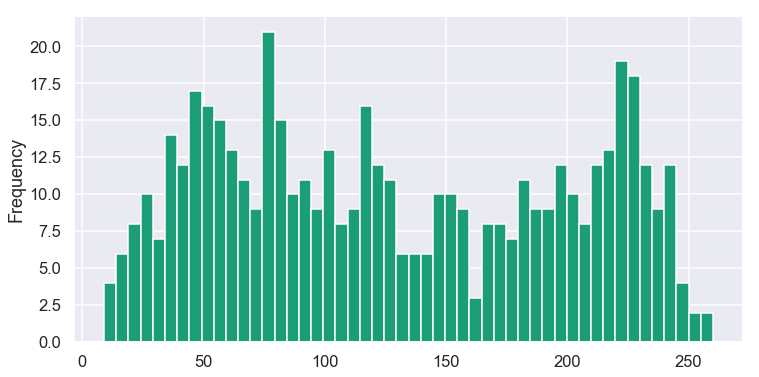

In [61]:
df['len'].plot(kind='hist',bins=50,figsize=(12,6))
#so most of the tweets which are extracted are in between the 50 to 100 length

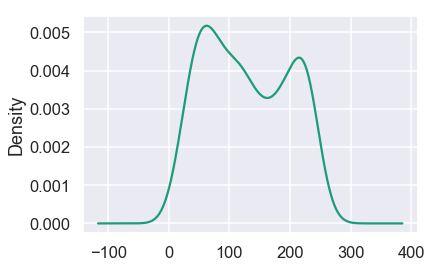

In [130]:
df['len'].plot(kind='kde')

In [132]:
print(np.mean(df['len']))

128.68430656934308


In [133]:
time_likes=pd.Series(data=df['len'].values,index=df['date'])

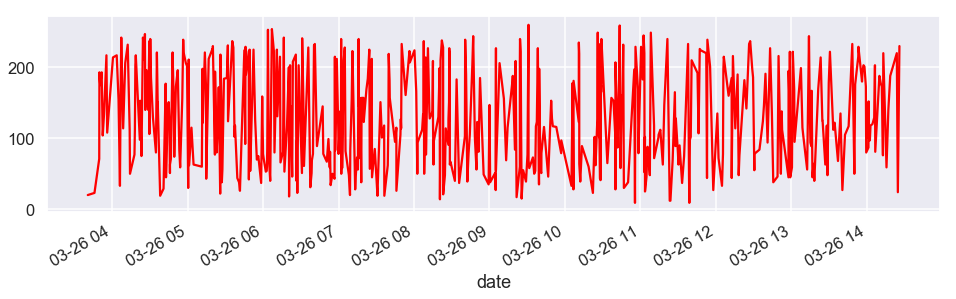

In [136]:
time_likes.plot(figsize=(16,4),color='r')
plt.show()

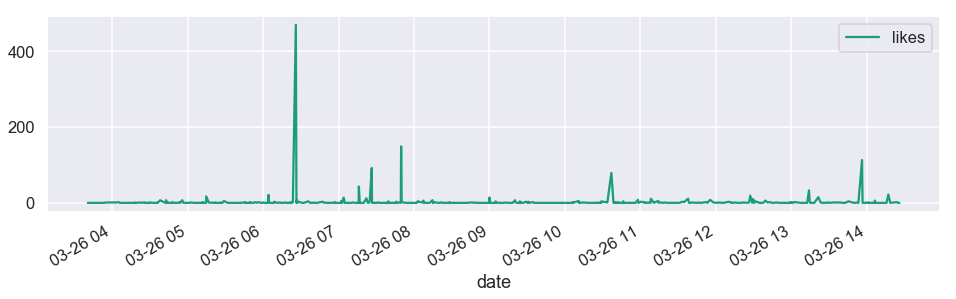

In [137]:
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), label="likes", legend=True)

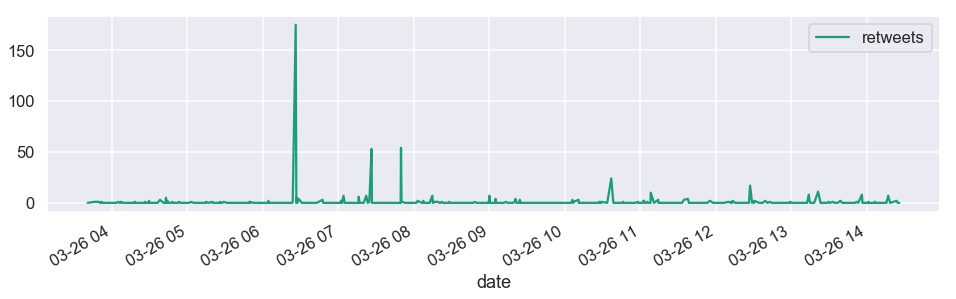

In [138]:
time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
plt.show()

In [1]:
import nltk
import seaborn as sns